# In this project, we will analyze weather data relating to various cities throughout the world.
# We will begin by generating a list on randomly selected cities.  Then we will make requests to the OpenWeatherMap API, in order to extract data relating to cities for which this API has data.  Thereafter we will also use our extracted data to form a dataframe, which we will clean, and export as a csv file.  Finally, we will create a number of graphs which display the relationship between city latitude, and some variable related to weather.

In [1]:
# We must first import our relevant scientific packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the citipy package to generate a list of randomly selected cities.
from citipy import citipy

# We will use the requests package to call on APIs.
import requests

# After extracting our data from the OpenWeatherMap API and cleaning it, we will check to see if an output directory exists.
# We will use the os package to check for the existence of this directory.
# If no such directory exists, we will use the os package to create the output directroy.
import os

# We will use the getpass function to keep our API key hidden.
import getpass

# We may return to this project at a later time and use the time and datetime functions to convert and format the UNIX timestamp column to a human date column in a more elegant way.
# import time
# import datetime

## In this section, we generate a list of randomly selected cities, and make requests to the OpenWeatherMap API to extract data relating to cities.  This API may not have data for every city in our list.

In [2]:
# We will use the getpass function to define the API key we are using to make requests, while keeping it hidden.
api_key = getpass.getpass()

········


In [3]:
# We will use the numpy and citipy packages to generate a list of randomly selected cities.
# First we use the random function of numpy to generate an array of random latitudes, and a second array of the same length of random longitudes.
# We will then use the primitive zip function with these two arrays to form coodinates pairs of latitude and longitude.
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitudes_and_longitudes = zip(latitudes, longitudes)

# The cities_to_check variable will be a list containing randomly selected cities using the citipy package.
# Later we will make API requests to OpenWeatherMap and try to extract data relating to each city.
# The citipy package may return cities, for which OpenWeatherMap has no- or missing data; hence, we are "checking" each city.
# Later we will define a new list containing only those cities, for which OpenWeatherMap does have data.
cities_to_check = []

# The citipy package will return the city closest to each coordinate pair.
# By using this method of returning cities in a for-loop, we will generate a list of random cities.
for latitude_and_longitude in latitudes_and_longitudes:
    city = citipy.nearest_city(latitude_and_longitude[0], latitude_and_longitude[1]).city_name
    
    # We do not want to add the same city to our list more than once, so we only append a city to our list if it is not already in the list.
    if city not in cities_to_check:
        cities_to_check.append(city)

# Here we print the length of the cities_to_check variable to confirm that we have a sufficient amount of cities.
len(cities_to_check)

606

In [4]:
# By using the requests package, we will be making calls to the OpenWeatherMap API.
# First we define the general URL variable;
# then we will be able to use this base URL, while defining other elements, such as which units to return numerical data in, and which city to check.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# This defines the more specific URL.
# It uses the general URL we defined earlier, and inserts our API key and the units we want our results in;
# later in a for-loop we will concatenate the specific city to the end of the URL.
query_url = f"{url}appid={api_key}&units={units}&q="

#### We now allow the user to input whether he or she wants to make API calls for the entire list of cities, or a subset thereof.  The original code- which did not allow this- will be left in the code (though commented out) in case we find an error in the future and need to refer back to a block of code we know works.

In [5]:
# # We are only allowed to make a limited amount of requests per a certain time restraint.
# # Here we make a subset of our cities_to_check list containing only the first 50 cities.
# # We will use this subset-list for testing purposes, and only use our full list once we are confident our code will work.
# cities_to_check_subset_for_testing = cities_to_check[:50]

In [6]:
# # We will soon use the pandas package to create a dataframe containing information about each city in our list, for which the OpenWeatherMap API has data.
# # Here we initialize a list for everything related to the city we are interested in.
# # When we are ready to make our dataframe, we will first define a dictionary containing each of these lists.
# # The list of cities we generated earlier will most likely contain cities for which the OpenWeatherMap API has no data.
# # Therefore these lists should be of shorter length than our full list of cities.
# # We can only create a dataframe from a list of dictionaries if each list is the same length.
# # Therefore, we define the city_names list to hold cities only for which data was found.
# city_names = []
# city_cloudinesses = []
# city_countries = []
# city_timestamps = []
# city_humidities = []
# city_latitudes = []
# city_longitudes = []
# city_max_temperatures = []
# city_wind_speeds = []

# number_of_cities_to_run_code_on = input(f"You are only allowed to make a limited number of API requests per a certain time limit.\nWould you like to make API calls for the entire list of {len(cities_to_check)} cities, or a subset?\nPlease enter 0 to use the entire list, or 1 to use a subset. ")

# try:
#     if int(number_of_cities_to_run_code_on) == 0:
        
#         entire_list_confirmation = input(f"Are you sure you want to make API calls for the entire list of {len(cities_to_check)} cities?\nYou are only allowed to make a limited number of API requests per a certain time limit.\nIf you exceed this limit, your API key may be temporarily suspended.\nIf you want to make API calls for the entire list of {len(cities_to_check)} cities, please type the word \"yes.\" ")
#         if entire_list_confirmation.lower() == "yes":
        
#             print("\nBeginning Data Retrieval")
        
#             for city in cities_to_check:
#                 response = requests.get(query_url + city).json()
#                 record_number = cities_to_check.index(city)
    
            
            
#                 # As stated before, the OpenWeatherMap API may not have data for every city in our list.
#                 # We must therefore use a try block and an except block.
#                 # This will ensure our program does not crash if the for-loop reaches a city for which the OpenWeatherMap API has no data.
#                 try:
#                     # By extracting the city name from the json file, the user can see which city the for-loop is currently testing, not only by index number, but by name.
#                     city_name = response["name"]
#                     print(f"Processing Record {(record_number)+1}: {city_name}")
#                     city_names.append(response["name"])
#                     city_cloudinesses.append(response["clouds"]["all"])
#                     city_countries.append(response["sys"]["country"])
#                     city_timestamps.append(response["dt"])
#                     city_humidities.append(response["main"]["humidity"])
#                     city_latitudes.append(response["coord"]["lat"])
#                     city_longitudes.append(response["coord"]["lon"])
#                     city_max_temperatures.append(response["main"]["temp_max"])
#                     city_wind_speeds.append(response["wind"]["speed"])
        
#                 except:
#                     print ("City not found.  Skipping...")
        
#             print("-----------------------------")
#             print("Data Retrieval Complete")
#             print("-----------------------------")
        
#     elif int(number_of_cities_to_run_code_on) == 1:
#         size_of_subset = input(f"How many cities would you like in your subset of {len(cities_to_check)} cities?\nPlease enter an integer. ")
        
#         cities_to_check_subset_for_testing = cities_to_check[:int(size_of_subset)]

#         # This block of code serves the same purpose as the block of code above.
#         # The only difference is that we are using a subset of the entire list of cities for testing purposes.
#         # We do this since we are restricted to a certain number of API calls per a certain time limit.
#         # We should only use the block of code above when we are confident in our code.

#         print("\nBeginning Data Retrieval")

#         # In this for-loop, we begin by using the requests package to return a json file containing the data we are interested in for each city.
#         # Earlier, we checked the length of our cities_to_check list to confirm it is a sufficient amount.
#         # In this loop we will print the index for each city, so that the user can see how many cities have been checked in real time.
#         for city in cities_to_check_subset_for_testing:
#             response = requests.get(query_url + city).json()
#             record_number = cities_to_check_subset_for_testing.index(city)
    
#             # As stated before, the OpenWeatherMap API may not have data for every city in our list.
#             # We must therefore use a try block and an except block.
#             # This will ensure our program does not crash if the for-loop reaches a city for which the OpenWeatherMap API has no data.
#             try:
#                 # By extracting the city name from the json file, the user can see which city the for-loop is currently testing.
#                 city_name = response["name"]
#                 print(f"Processing Record {(record_number) +1}: {city_name}")
#                 city_names.append(response["name"])
#                 city_cloudinesses.append(response["clouds"]["all"])
#                 city_countries.append(response["sys"]["country"])
#                 city_timestamps.append(response["dt"])
#                 city_humidities.append(response["main"]["humidity"])
#                 city_latitudes.append(response["coord"]["lat"])
#                 city_longitudes.append(response["coord"]["lon"])
#                 city_max_temperatures.append(response["main"]["temp_max"])
#                 city_wind_speeds.append(response["wind"]["speed"])
        
#             except:
#                 print ("City not found.  Skipping...")
        
#         print("-----------------------------")
#         print("Data Retrieval Complete")
#         print("-----------------------------")
# except:
#     print("It appears you gave an invalid input.  Please try again.")

In [7]:
# We will soon use the pandas package to create a dataframe containing information about each city in our list, for which the OpenWeatherMap API has data.
# Here we initialize a list for everything related to the city we are interested in.
# When we are ready to make our dataframe, we will first define a dictionary containing each of these lists.
# The list of cities we generated earlier will most likely contain cities for which the OpenWeatherMap API has no data.
# Therefore these lists should be of shorter length than our full list of cities.
# We can only create a dataframe from a list of dictionaries if each list is the same length.
# Therefore, we define the city_names list to hold cities only for which data was found.
city_names = []
city_cloudinesses = []
city_countries = []
city_timestamps = []
city_humidities = []
city_latitudes = []
city_longitudes = []
city_max_temperatures = []
city_wind_speeds = []

# We are only allowed to make a limited number of API requests per a certain time limit.
# If we exceed this limit, our API key may be temporarily suspended.
# The entire_list_or_subset variable allows the user to tell the program whether he or she would like to make API calls for the entire list of cities, or a subset.
entire_list_or_subset = input(f"You are only allowed to make a limited number of API requests per a certain time limit.\nWould you like to make API calls for the entire list of {len(cities_to_check)} cities, or a subset?\nPlease enter 0 to use the entire list, or 1 to use a subset. ")

# We ask the user to input the integer 0 to run API calls for the entire list of cities, or 1 for a subset.
# We put the API-call loops in a try-except block, so that the program will not crash if the user's input is not 0 or 1.
try:
    if int(entire_list_or_subset) == 0:
        
        # If we exceed the limit of API requests, our API key may be temporarily suspended.
        # We require the user to confirm he or she wants to use the entire list of cities before the program will allow it.
        entire_list_confirmation = input(f"\nAre you sure you want to make API calls for the entire list of {len(cities_to_check)} cities?\nYou are only allowed to make a limited number of API requests per a certain time limit.\nIf you exceed this limit, your API key may be temporarily suspended.\nIf you want to make API calls for the entire list of {len(cities_to_check)} cities, please type the word \"yes.\" ")
        if entire_list_confirmation.lower() == "yes":
        
            print("\nBeginning Data Retrieval")
            print("-----------------------------")
        
            # The response variable will hold a URL containing a JSON file of weather data, which we will extract data from.
            # Earlier, we checked the length of our cities_to_check list to confirm it is a sufficient amount.
            # In this loop we will print the index for each city, so that the user can see how many cities have been checked in real time.
            for city in cities_to_check:
                response = requests.get(query_url + city).json()
                record_number = cities_to_check.index(city)
    
                # As stated before, the OpenWeatherMap API may not have data for every city in our list.
                # We must therefore use a try block and an except block.
                # This will ensure our program does not crash if the for-loop reaches a city for which the OpenWeatherMap API has no data.
                try:
                    # By extracting the city name from the json file, the user can see which city the for-loop is currently testing, not only by index number, but by name.
                    city_name = response["name"]
                    print(f"Processing record {(record_number)+1} of {len(cities_to_check)}: {city_name}")
                    city_names.append(response["name"])
                    city_cloudinesses.append(response["clouds"]["all"])
                    city_countries.append(response["sys"]["country"])
                    city_timestamps.append(response["dt"])
                    city_humidities.append(response["main"]["humidity"])
                    city_latitudes.append(response["coord"]["lat"])
                    city_longitudes.append(response["coord"]["lon"])
                    city_max_temperatures.append(response["main"]["temp_max"])
                    city_wind_speeds.append(response["wind"]["speed"])
        
                except:
                    print (f"Processing record {(record_number)+1} of {len(cities_to_check)}. City not found.  Skipping...")
        
            print("-----------------------------")
            print("Data Retrieval Complete")
            print("-----------------------------")
        
        # We asked the user to confirm that he or she really wants to make API requests for the entire list of cities.
        # If the user does not give the appropriate confirmation input, the process will be terminated.
        else:
            print("\nConfirmation not detected.  Exiting process.")
        
    elif int(entire_list_or_subset) == 1:
        # If the user chooses to use a subset of the list of cities, we allow the user to define the size of that subset.
        size_of_subset = int(input(f"How many cities would you like in your subset of {len(cities_to_check)} cities?\nPlease enter an integer. "))
        
        # We allow the user to define the size of the subset of cities.
        # If the user inputs a size larger than the full list of cities, we inform the user, and exit the process.
        if size_of_subset > len(cities_to_check):
            print("\nError: You asked to make a subset larger than the size of the full list of cities.\nPlease try again. ")

         # We allow the user to define the size of the subset of cities.
        # If the user inputs a size equal to the full list of cities, we inform the user, and exit the process.
        elif size_of_subset == len(cities_to_check):
            print("\nError: You asked to make a subset the same size as the full list of cities.\nIf you would like to use the full list, please try again, and give the appropriate input. ")
        
        else:
            cities_to_check_subset_for_testing = cities_to_check[:size_of_subset]
        
            # This block of code serves the same purpose as the block of code above.
            # The only difference is that we are using a subset of the entire list of cities for testing purposes.
            # We do this since we are restricted to a certain number of API calls per a certain time limit.
            # We should only use the full list of cities when we are confident in the rest of our code.

            print("\nBeginning Data Retrieval")
            print("-----------------------------")
            
            # The response variable will hold a URL containing a JSON file of weather data, which we will extract data from.
            # Earlier, we checked the length of our cities_to_check list to confirm it is a sufficient amount.
            # In this loop we will print the index for each city, so that the user can see how many cities have been checked in real time.
            for city in cities_to_check_subset_for_testing:
                response = requests.get(query_url + city).json()
                record_number = cities_to_check_subset_for_testing.index(city)
    
                # As stated before, the OpenWeatherMap API may not have data for every city in our list.
                # We must therefore use a try block and an except block.
                # This will ensure our program does not crash if the for-loop reaches a city for which the OpenWeatherMap API has no data.
                try:
                    # By extracting the city name from the json file, the user can see which city the for-loop is currently testing.
                    city_name = response["name"]
                    print(f"Processing record {(record_number) +1} of {len(cities_to_check_subset_for_testing)}: {city_name}")
                    city_names.append(response["name"])
                    city_cloudinesses.append(response["clouds"]["all"])
                    city_countries.append(response["sys"]["country"])
                    city_timestamps.append(response["dt"])
                    city_humidities.append(response["main"]["humidity"])
                    city_latitudes.append(response["coord"]["lat"])
                    city_longitudes.append(response["coord"]["lon"])
                    city_max_temperatures.append(response["main"]["temp_max"])
                    city_wind_speeds.append(response["wind"]["speed"])
        
                except:
                    print (f"Processing record {(record_number) + 1} of {len(cities_to_check_subset_for_testing)}. City not found.  Skipping...")
        
            print("-----------------------------")
            print("Data Retrieval Complete")
            print("-----------------------------")
except:
    print("\nIt appears you gave an invalid input.  Please try again.")

You are only allowed to make a limited number of API requests per a certain time limit.
Would you like to make API calls for the entire list of 606 cities, or a subset?
Please enter 0 to use the entire list, or 1 to use a subset. 0

Are you sure you want to make API calls for the entire list of 606 cities?
You are only allowed to make a limited number of API requests per a certain time limit.
If you exceed this limit, your API key may be temporarily suspended.
If you want to make API calls for the entire list of 606 cities, please type the word "yes." yes

Beginning Data Retrieval
-----------------------------
Processing record 1 of 606: Leningradskiy
Processing record 2 of 606: Mahebourg
Processing record 3 of 606: Mar del Plata
Processing record 4 of 606: Albany
Processing record 5 of 606: Xai-Xai
Processing record 6 of 606: Kankan
Processing record 7 of 606: Punta Arenas
Processing record 8 of 606: Rikitea
Processing record 9 of 606: Guerrero Negro
Processing record 10 of 606: Mulan

Processing record 184 of 606: San Patricio
Processing record 185 of 606: Arroyo
Processing record 186 of 606: Banjar
Processing record 187 of 606: Namibe
Processing record 188 of 606: Tuktoyaktuk
Processing record 189 of 606: Bambous Virieux
Processing record 190 of 606: Jasrana
Processing record 191 of 606: Te Anau
Processing record 192 of 606: Tessalit
Processing record 193 of 606: Sampit
Processing record 194 of 606: Avera
Processing record 195 of 606: Dingle
Processing record 196 of 606: Luderitz
Processing record 197 of 606: Torbay
Processing record 198 of 606: Lisakovsk
Processing record 199 of 606: Saint Anthony
Processing record 200 of 606. City not found.  Skipping...
Processing record 201 of 606: Matara
Processing record 202 of 606: Bilibino
Processing record 203 of 606: Hyeres
Processing record 204 of 606: Alofi
Processing record 205 of 606. City not found.  Skipping...
Processing record 206 of 606. City not found.  Skipping...
Processing record 207 of 606. City not found.  

Processing record 384 of 606: Isilkul
Processing record 385 of 606. City not found.  Skipping...
Processing record 386 of 606: Talaya
Processing record 387 of 606: Zhongshu
Processing record 388 of 606: Hedaru
Processing record 389 of 606: Adamantina
Processing record 390 of 606: College
Processing record 391 of 606: Bud
Processing record 392 of 606: Vanimo
Processing record 393 of 606: Ust-Kan
Processing record 394 of 606: Santa Vitoria do Palmar
Processing record 395 of 606: Cabo San Lucas
Processing record 396 of 606: Hirara
Processing record 397 of 606: Sola
Processing record 398 of 606: Mbekenyera
Processing record 399 of 606: Mungwi
Processing record 400 of 606: Luba
Processing record 401 of 606: Lobito
Processing record 402 of 606: Paranaiba
Processing record 403 of 606: Kabelvag
Processing record 404 of 606: Navirai
Processing record 405 of 606: Sydney
Processing record 406 of 606: Chapais
Processing record 407 of 606. City not found.  Skipping...
Processing record 408 of 606: 

Processing record 583 of 606: Elko
Processing record 584 of 606: Houston
Processing record 585 of 606: Vila
Processing record 586 of 606: Berlevag
Processing record 587 of 606: Slave Lake
Processing record 588 of 606: Adre
Processing record 589 of 606: Princeton
Processing record 590 of 606: Fayaoue
Processing record 591 of 606: Airai
Processing record 592 of 606. City not found.  Skipping...
Processing record 593 of 606: Umtata
Processing record 594 of 606: Teahupoo
Processing record 595 of 606: Kenai
Processing record 596 of 606: Surgut
Processing record 597 of 606: Denpasar
Processing record 598 of 606: Nemuro
Processing record 599 of 606: Coari
Processing record 600 of 606: Letlhakane
Processing record 601 of 606: Carlsbad
Processing record 602 of 606: Zaraza
Processing record 603 of 606: Grand-Santi
Processing record 604 of 606: Orcopampa
Processing record 605 of 606: Naranjo
Processing record 606 of 606: Senno
-----------------------------
Data Retrieval Complete
----------------

## In this section we use the data we retrieved from the OpenWeatherMap API to create a dataframe.  We also clean this dataframe and export it as a csv file.

In [8]:
# We will soon create a dataframe using the data we extracted from the OpenWeatherMap API.
# Here we define a dictionary of the lists we defined in the for-loop that made calls to the API.
# We will use this dictionary for the data in our dataframe.
weather_data_dictionary = {
    "City": city_names,
    "Cloudiness": city_cloudinesses,
    "Country": city_countries,
    "UNIX Timestamp": city_timestamps,
    "Humidity": city_humidities,
    "Latitude": city_latitudes,
    "Longitude": city_longitudes,
    "Max Temperature": city_max_temperatures,
    "Wind Speed": city_wind_speeds
}

In [9]:
# Here we create a dataframe using the dictionary of lists we defined earlier.
weather_data = pd.DataFrame(weather_data_dictionary)
weather_data.head()

,City,Cloudiness,Country,UNIX Timestamp,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Leningradskiy,80,RU,1539315256,98,69.38,178.42,35.51,13.22
1,Mahebourg,40,MU,1539313200,64,-20.41,57.70,73.40,16.11
2,Mar del Plata,0,AR,1539315313,51,-46.43,-67.52,48.38,13.00
3,Albany,90,US,1539314220,86,42.65,-73.75,66.02,10.29
4,Xai-Xai,0,MZ,1539315424,93,-25.04,33.64,72.36,11.99


##### In the following few cells we tried creating a new column of dates from the UNIX time stamp column with the format YYYY-MM-DD.  These lines did not have the desired results, but we will keep them commented out for now, rather than deleting them, so that we may return later and try these ways again.

In [10]:
# datetime.datetime.fromtimestamp(1539040243)
# time.strftime("%Y-%m-%d")

In [11]:
# dates = []
# for timestamp in weather_data["UNIX Timestamp"]:
#     dates.append(datetime.datetime.fromtimestamp(timestamp))
#     time.strftime("%Y-%m-%d")

In [12]:
# weather_data["Date"] = dates
# weather_data.head()

In [13]:
# # The API call returned the time as a UNIX timestamp, so here we add a column to our dataframe showing a more readable human time.
# # We create this column us the to_datetime function of the pandas package.
# weather_data["Date"] = pd.to_datetime(weather_data["UNIX Timestamp"], unit="s")
# # weather_data["Date"] = pd.to_datetime(weather_data["UNIX Timestamp"].astype(str))
# # weather_data["Date"] = weather_data.astype(str)
# weather_data.head()

In [14]:
# Our API call returned the date as a UNIX timestamp.
# Here we use the pandas to_datetime function to convert this to a more readable human date.
# Instead of overwriting the UNIX timestamp, we will store the converted dates in a new column.
weather_data["Date (YYYY-MM-DD HH-MM-SS)"] = pd.to_datetime(weather_data["UNIX Timestamp"], unit="s")
weather_data.head()

,City,Cloudiness,Country,UNIX Timestamp,Humidity,Latitude,Longitude,Max Temperature,Wind Speed,Date (YYYY-MM-DD HH-MM-SS)
0,Leningradskiy,80,RU,1539315256,98,69.38,178.42,35.51,13.22,2018-10-12 03:34:16
1,Mahebourg,40,MU,1539313200,64,-20.41,57.70,73.40,16.11,2018-10-12 03:00:00
2,Mar del Plata,0,AR,1539315313,51,-46.43,-67.52,48.38,13.00,2018-10-12 03:35:13
3,Albany,90,US,1539314220,86,42.65,-73.75,66.02,10.29,2018-10-12 03:17:00
4,Xai-Xai,0,MZ,1539315424,93,-25.04,33.64,72.36,11.99,2018-10-12 03:37:04


In [15]:
# When we convert the UNIX timestamp to a more readable human date, the new date includes hours, minutes, and seconds.
# Here we will define the list variable dates, which will contain the date for each weather-data record.
# We will then use a for-loop, in which we will cast the date as a string, and set the date to only the first 10 characters thereof.
# Our date is in the format "YYYY-MM-DD HH:MM:SS".
# The First "Y" to the last "D", including the dashes, make up 10 characters.
# Finally, we will set the date column equal to this new list of formatted dates.
dates = []

for date in weather_data["Date (YYYY-MM-DD HH-MM-SS)"]:
    date = str(date)[:10]
    dates.append(date)

weather_data["Date (YYYY-MM-DD)"] = dates

weather_data = weather_data.drop(columns=["Date (YYYY-MM-DD HH-MM-SS)"])
weather_data.head()

,City,Cloudiness,Country,UNIX Timestamp,Humidity,Latitude,Longitude,Max Temperature,Wind Speed,Date (YYYY-MM-DD)
0,Leningradskiy,80,RU,1539315256,98,69.38,178.42,35.51,13.22,2018-10-12
1,Mahebourg,40,MU,1539313200,64,-20.41,57.70,73.40,16.11,2018-10-12
2,Mar del Plata,0,AR,1539315313,51,-46.43,-67.52,48.38,13.00,2018-10-12
3,Albany,90,US,1539314220,86,42.65,-73.75,66.02,10.29,2018-10-12
4,Xai-Xai,0,MZ,1539315424,93,-25.04,33.64,72.36,11.99,2018-10-12


In [16]:
# Here we reorder the columns of our weather_data dataframe.
weather_data = weather_data[["City", "Country", "Date (YYYY-MM-DD)", "Max Temperature", "Humidity", "Wind Speed", "Cloudiness", "Latitude", "Longitude", "UNIX Timestamp"]]
weather_data.head()

,City,Country,Date (YYYY-MM-DD),Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,UNIX Timestamp
0,Leningradskiy,RU,2018-10-12,35.51,98,13.22,80,69.38,178.42,1539315256
1,Mahebourg,MU,2018-10-12,73.40,64,16.11,40,-20.41,57.70,1539313200
2,Mar del Plata,AR,2018-10-12,48.38,51,13.00,0,-46.43,-67.52,1539315313
3,Albany,US,2018-10-12,66.02,86,10.29,90,42.65,-73.75,1539314220
4,Xai-Xai,MZ,2018-10-12,72.36,93,11.99,0,-25.04,33.64,1539315424


In [17]:
# Here we export our cleaned dataframe as a csv file.
# We first check to see if an output directory already exists using the exists function from the os package.
# We assume the user will either use capitalization, lowercase, or uppercase for the name of this output directory.
# If such a directory does exist, we simply export the csv file thereto.
# If there is no output directory, we use the mkdir function from the os package to create the directory; then we export the csv file thereto.

if os.path.exists("Output") == True | os.path.exists("output") == True | os.path.exists("OUTPUT" == True):
    weather_data_csv = weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=False, header=True)
    
else:
    os.mkdir("Output")
    weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=False, header=True)

## In this section, we create various graphs showing the relationship between latitude, and a weather-related variable.

In [18]:
# We will display the date on each graph using a f-string.
# Every value in the the Date column of our weather_data dataframe should have the same value, as each value came from an API call made at the same time in a for-loop.
# Therefore we simply use the value of the first row from the date column as our current_date variable.

if weather_data["Date (YYYY-MM-DD)"].nunique() == 1:
    current_date = str(weather_data["Date (YYYY-MM-DD)"][0]) + " (YYYY-MM-DD)"
    print(f"The current date is set to {current_date}")
elif weather_data["Date (YYYY-MM-DD)"].nunique() == 2:
    current_date = str(weather_data["Date (YYYY-MM-DD)"].unique()[1]) + " through " + str(weather_data["Date (YYYY-MM-DD)"].unique()[0]) + " (YYYY-MM-DD)"
    print(f"Because of timezone differences, two dates were detected.\nThe current date is set to {current_date}")
else:
    print("There were more than 2 dates detected in our date column.  Please check the code and try again.")

The current date is set to 2018-10-12 (YYYY-MM-DD)


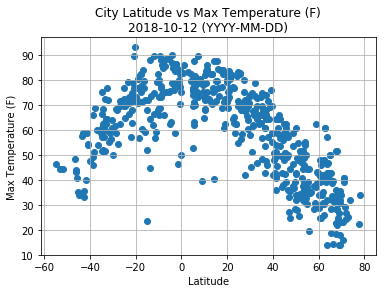

In [19]:
# Here we create a scatter plot showing the relationship between latitude, and the maximum temperature for the day.
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"])
plt.title(f"City Latitude vs Max Temperature (F)\n{current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

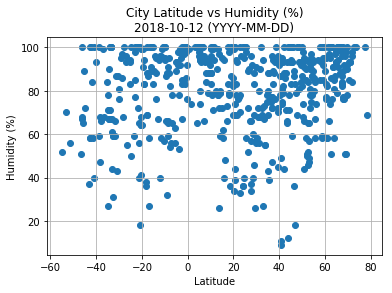

In [20]:
# Here we create a graph showing the relationship between latitude, and the humidity for the day.
plt.scatter(weather_data[weather_data["Humidity"] <= 100]["Latitude"], weather_data[weather_data["Humidity"] <= 100]["Humidity"])
plt.title(f"City Latitude vs Humidity (%)\n{current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

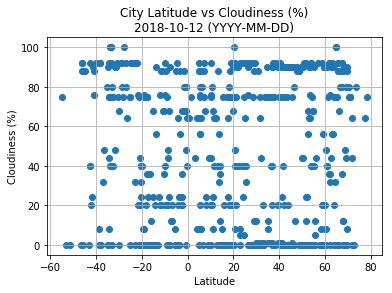

In [21]:
# Here we create a graph showing the relationship between latitude and cloudiness for the day.
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"])
plt.title(f"City Latitude vs Cloudiness (%)\n{current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

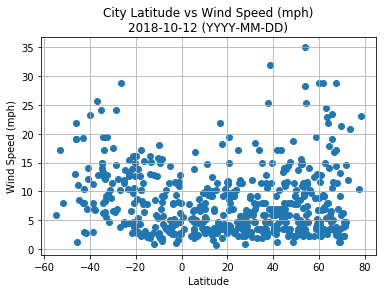

In [22]:
# Here we create a graph showing the relationship between latitude and wind speed for the day.
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed (mph)\n{current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

In [47]:
weather_data[(weather_data["Latitude"] > -20) & (weather_data["Latitude"] < 0) & (weather_data["Max Temperature"] < 30)]

,City,Country,Date (YYYY-MM-DD),Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,UNIX Timestamp
539,Orcopampa,PE,2018-10-12,23.63,83,2.26,24,-15.27,-72.34,1539315577


In [110]:
weather_data_longitude_between_negative_80_and_negative_70 = weather_data[(weather_data["Longitude"] >= -80) & (weather_data["Longitude"] <= -70)]
weather_data_longitude_not_in_range_negative_80_to_negative_70 = weather_data[(weather_data["Longitude"] < -80) | (weather_data["Longitude"] > -70)]

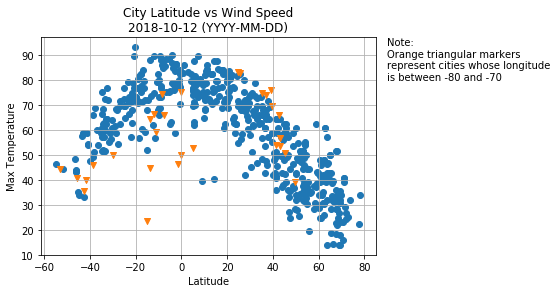

In [112]:
plt.scatter(weather_data_longitude_not_in_range_negative_80_to_negative_70["Latitude"], weather_data_longitude_not_in_range_negative_80_to_negative_70["Max Temperature"])
plt.scatter(weather_data_longitude_between_negative_80_and_negative_70["Latitude"], weather_data_longitude_between_negative_80_and_negative_70["Max Temperature"], marker="v")
plt.title(f"City Latitude vs Wind Speed\n{current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(90,80,"Note:\nOrange triangular markers\nrepresent cities whose longitude\nis between -80 and -70")
plt.grid()

## Trend Analysis

### 1.

There is a clear parabolic relationship between latitude and max temperature.  The closer a city's latitude is to 0, the higher its temperature is.  We notice however an outlier.  One city's latitude lies between -20 and 0, yet it's max temperature is recorded as below 30 degrees. Fahrenheit.  We examine this city further and find it's longitude between -80 and -70.  If we plot the same graph and highlight other cities within this longitudinal range, we see that most cities have a predictable max temperature.

The cities in our longitudinal subset that are also within the latitudinal range of -20 to 20 seem to be splot, with about half having the max temperature we would expect, and the other half having lower temperatures.  We wonder if there are other factors which could explain this phenomenon.

### 2.

The majority of the cities in our list seem to have a high humidity.  Some even reach 100% and create a mathematical cieling.

### 2.

There does not appear to be any relationship between latitude and cloudiness.  It is however interesting to note that a lot of cities show either 0% cloudiness, or approximately 90% cloudiness.  This makes us wonder how cloudiness is determined.

Is it scientifically calculated, or does someone look in the sky and approximate it?  If there are very few clouds, does that someone just call it 0%, and if it there are very many, does that someone simply call it "about 90%" for simplicity sake?  If it is scientifically calculated using some tool, it's very interesting how little data there is in the middle.

### 3.

